# Classification de Fruits en utilisant CNN

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



### Step1: DataSet

In [3]:
img_height, img_width = 32, 32
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\uzi\Desktop\fruits\train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\uzi\Desktop\fruits\validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\uzi\Desktop\fruits\test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


### Step2: Data visualization

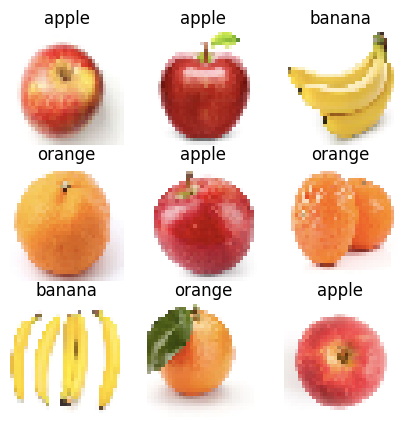

In [4]:
class_names=train_dataset.class_names
plt.figure(figsize=(5,5))
for image, label in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")
plt.show()

### Step3: creation du modele CNN

In [5]:
modelCNN=tf.keras.Sequential(
    [
        #extraction
        tf.keras.layers.Rescaling(1./255), #normalisation
        #32 nbr de filtre
        tf.keras.layers.Conv2D(64, (3,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(), #D => 1D
        #classification
        tf.keras.layers.Dense(128, activation="relu"),#couche cache 128
        tf.keras.layers.Dense(3, activation="softmax")

    ]
)

### Step4: Parametres

In [6]:

modelCNN.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Step5: Training model

In [7]:
modelCNN.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.6304 - loss: 0.7756 - val_accuracy: 0.8030 - val_loss: 0.4980
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7739 - loss: 0.5559 - val_accuracy: 0.8636 - val_loss: 0.3359
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8609 - loss: 0.3550 - val_accuracy: 0.8939 - val_loss: 0.2565
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.8957 - loss: 0.2710 - val_accuracy: 0.8788 - val_loss: 0.2658
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8957 - loss: 0.2517 - val_accuracy: 0.8485 - val_loss: 0.4673
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9500 - loss: 0.1648 - val_accuracy: 0.9242 - val_loss: 0.2001
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9587 - loss: 0.1177 - val_accuracy: 0.8939 - val_loss: 0.2986
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9783 - loss: 0.0717 - val_accuracy: 0.9242 - 

In [8]:
modelCNN.evaluate(test_dataset, verbose=2)

5/5 - 0s - 65ms/step - accuracy: 0.9615 - loss: 0.1118


[0.11177193373441696, 0.9615384340286255]

In [9]:
for images,labels in test_dataset.take(1):
    predictions=modelCNN.predict(images)
    predicted_classes=np.argmax(predictions,axis=1)
    for i in range(len(images)):
        print(f"vrai :{class_names[labels[i]]} , Predit:{class_names[predicted_classes[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :apple , Predit:orange
vrai :apple , Predit:apple
vrai :apple , Predit:apple
vrai :apple , Predit:apple
vrai :banana , Predit:banana
vrai :banana , Predit:banana
vrai :apple , Predit:orange
vrai :apple , Predit:apple
vrai :apple , Predit:apple
vrai :apple , Predit:orange
vrai :banana , Predit:banana
vrai :banana , Predit:banana
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :apple , Predit:apple
vrai :banana , Predit:banana
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :apple , Predit:apple
vrai :banana , Predit:banana
vrai :banana , Predit:banana
vrai :apple , Predit:apple
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :orange , Predit:orange
vrai :apple , Predit:apple
vrai :banana , Predit:banana
vrai :apple , Predit:apple


In [ ]:
modelCNN.save('fruits_cnn.h5')

In [5]:
print(class_names)   # run in Python where you trained the model


['apple', 'banana', 'orange']
